In [2]:
import os
import pandas as pd
import numpy as np
from scipy import ndimage
from skimage import io
import matplotlib
import matplotlib.pyplot as plt


In [2]:
root_path = "C:/Users/Nathan/Documents/data/fucci/"

gfp_dir = os.path.join(root_path, "gfp")
rfp_dir = os.path.join(root_path, "rfp")
phase_dir = os.path.join(root_path, "phase")

gfp_list = [m for m in os.listdir(gfp_dir) if m.endswith('.tif')]
rfp_list = [m for m in os.listdir(rfp_dir) if m.endswith('.tif')]
phase_list = [m for m in os.listdir(phase_dir) if m.endswith('.tif')]

cell_ids = [ "3b", "4", "5"]
mask_type = "gold" #gold standard or modelv4, modelv5 etc
 


In [5]:
os.system('spd-say "it puts the lotion on the skin or else it gets the hose again"')

0

In [3]:
for cell in cell_ids:

    masks_dir_name = "labels_cell" + cell 
    masks_dir = os.path.normpath(os.path.join(root_path, "singlecell_labels_manual", masks_dir_name))
    mask_list = [m for m in os.listdir(masks_dir) if m.endswith('modified.tif')] # add something to include unmodified if modified doesnt exist?

    ### DIRECTORY CREATION ###
    dirName = os.path.join(root_path, 'stats') 
    try:
    # Create target Directory
        os.mkdir(dirName)
        print("Directory " , dirName ,  " Created ") 
    except FileExistsError:
        print("Directory " , dirName ,  " already exists")
    
    mask_type_dirName = os.path.join(dirName, mask_type) 
    try:
    # Create target Directory
        os.mkdir(mask_type_dirName)
        print("Directory " , mask_type_dirName ,  " Created ") 
    except FileExistsError:
        print("Directory " , mask_type_dirName ,  " already exists")    
            
    stat_file_dir = os.path.normpath(os.path.join(mask_type_dirName, "cell"+cell))
    try:
    # Create target Directory
        os.mkdir(stat_file_dir)
        print("Directory " , stat_file_dir ,  " Created ") 
    except FileExistsError:
        print("Directory " , stat_file_dir ,  " already exists")        
        #create target file
    stat_file = os.path.normpath(os.path.join(stat_file_dir, 'stats.csv'))
    
    df = pd.DataFrame([], columns=['GFP Intensity', 'RFP Intensity', 'Phase Intensity', 'Area', 'x','y']) #is this assignment of df correct? or does it overwrite "count_cells" above
   
    for i, mask_name in enumerate(mask_list):
        
        print(i)
        print(cell)
        
        mask = io.imread(os.path.normpath(os.path.join(masks_dir, mask_name)))
        labelled, n_labels = ndimage.label(mask)
        
        gfp = io.imread(os.path.join(gfp_dir,gfp_list[i]))
        gfp_pix_value = ndimage.sum(gfp, labelled, 1) 
    
        rfp = io.imread(os.path.join(rfp_dir,rfp_list[i]))
        rfp_pix_value = ndimage.sum(rfp, labelled, 1)
        
        phase = io.imread(os.path.join(phase_dir,phase_list[i]))
        phase_pix_value = ndimage.sum(phase, labelled, 1)

        
        df.loc[i,'GFP Intensity'] = gfp_pix_value 
        df.loc[i,'RFP Intensity'] = rfp_pix_value
        df.loc[i,'Phase Intensity'] = phase_pix_value 
        df.loc[i,'Area'] = ndimage.sum(mask)
        #df.loc[i,'Max'] =  ndimage.maximum(phase, labelled)

        centroid = ndimage.measurements.center_of_mass(mask)
        y = centroid[0]
        x = centroid[1]
        df.loc[i,'x'] = format(x, '.2f')
        df.loc[i,'y'] = format(y, '.2f')
    
    df.to_csv(stat_file, index=False)  
    print(df)
print('FIN')    

Directory  C:/Users/Nathan/Documents/data/fucci/stats  already exists
Directory  C:/Users/Nathan/Documents/data/fucci/stats\gold  already exists
Directory  C:\Users\Nathan\Documents\data\fucci\stats\gold\cell3b  already exists
0
3b
1
3b
2
3b
3
3b
4
3b
5
3b
6
3b
7
3b
8
3b
9
3b
10
3b
11
3b
12
3b
13
3b
14
3b
15
3b
16
3b
17
3b
18
3b
19
3b
20
3b
21
3b
22
3b
23
3b
24
3b
25
3b
26
3b
27
3b
28
3b
29
3b
30
3b
31
3b
32
3b
33
3b
34
3b
35
3b
36
3b
37
3b
38
3b
39
3b
40
3b
41
3b
42
3b
43
3b
44
3b
45
3b
46
3b
47
3b
48
3b
49
3b
50
3b
51
3b
52
3b
53
3b
54
3b
55
3b
56
3b
57
3b
58
3b
59
3b
60
3b
61
3b
62
3b
63
3b
64
3b
65
3b
66
3b
67
3b
68
3b
69
3b
70
3b
71
3b
72
3b
73
3b
74
3b
75
3b
76
3b
77
3b
78
3b
79
3b
80
3b
81
3b
82
3b
83
3b
84
3b
85
3b
86
3b
87
3b
88
3b
89
3b
90
3b
91
3b
92
3b
93
3b
94
3b
95
3b
96
3b
97
3b
98
3b
99
3b
100
3b
101
3b
102
3b
103
3b
104
3b
105
3b
106
3b
107
3b
108
3b
109
3b
110
3b
111
3b
112
3b
113
3b
114
3b
115
3b
116
3b
117
3b
118
3b
119
3b
120
3b
121
3b
122
3b
123
3b
124
3b
125
3b
1

1
4
2
4
3
4
4
4
5
4
6
4
7
4
8
4
9
4
10
4
11
4
12
4
13
4
14
4
15
4
16
4
17
4
18
4
19
4
20
4
21
4
22
4
23
4
24
4
25
4
26
4
27
4
28
4
29
4
30
4
31
4
32
4
33
4
34
4
35
4
36
4
37
4
38
4
39
4
40
4
41
4
42
4
43
4
44
4
45
4
46
4
47
4
48
4
49
4
50
4
51
4
52
4
53
4
54
4
55
4
56
4
57
4
58
4
59
4
60
4
61
4
62
4
63
4
64
4
65
4
66
4
67
4
68
4
69
4
70
4
71
4
72
4
73
4
74
4
75
4
76
4
77
4
78
4
79
4
80
4
81
4
82
4
83
4
84
4
85
4
86
4
87
4
88
4
89
4
90
4
91
4
92
4
93
4
94
4
95
4
96
4
97
4
98
4
99
4
100
4
101
4
102
4
103
4
104
4
105
4
106
4
107
4
108
4
109
4
110
4
111
4
112
4
113
4
114
4
115
4
116
4
117
4
118
4
119
4
120
4
121
4
122
4
123
4
124
4
125
4
126
4
127
4
128
4
129
4
130
4
131
4
132
4
133
4
134
4
135
4
136
4
137
4
138
4
139
4
140
4
141
4
142
4
143
4
144
4
145
4
146
4
147
4
148
4
149
4
150
4
151
4
152
4
153
4
154
4
155
4
156
4
157
4
158
4
159
4
160
4
161
4
162
4
163
4
164
4
165
4
166
4
167
4
168
4
169
4
170
4
171
4
172
4
173
4
174
4
175
4
176
4
177
4
178
4
179
4
180
4
181
4
182
4
183
4
184
4
185


115
5
116
5
117
5
118
5
119
5
120
5
121
5
122
5
123
5
124
5
125
5
126
5
127
5
128
5
129
5
130
5
131
5
132
5
133
5
134
5
135
5
136
5
137
5
138
5
139
5
140
5
141
5
142
5
143
5
144
5
145
5
146
5
147
5
148
5
149
5
150
5
151
5
152
5
153
5
154
5
155
5
156
5
157
5
158
5
159
5
160
5
161
5
162
5
163
5
164
5
165
5
166
5
167
5
168
5
169
5
170
5
171
5
172
5
173
5
174
5
175
5
176
5
177
5
178
5
179
5
180
5
181
5
182
5
183
5
184
5
185
5
186
5
187
5
188
5
189
5
190
5
191
5
192
5
193
5
194
5
195
5
196
5
197
5
198
5
199
5
200
5
201
5
202
5
203
5
204
5
205
5
206
5
207
5
208
5
209
5
210
5
211
5
212
5
213
5
214
5
215
5
216
5
217
5
218
5
219
5
220
5
221
5
222
5
223
5
224
5
225
5
226
5
227
5
228
5
229
5
230
5
231
5
232
5
233
5
234
5
235
5
236
5
237
5
238
5
239
5
240
5
241
5
242
5
243
5
244
5
245
5
246
5
247
5
248
5
249
5
250
5
251
5
252
5
253
5
254
5
255
5
256
5
257
5
258
5
259
5
260
5
261
5
262
5
263
5
264
5
265
5
266
5
267
5
268
5
269
5
270
5
271
5
272
5
273
5
274
5
275
5
276
5
277
5
278
5
279
5
280
5
281


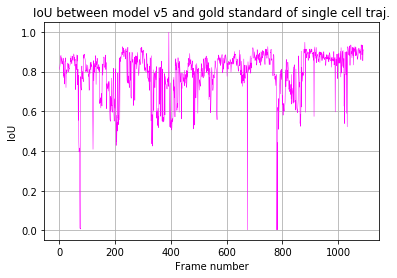

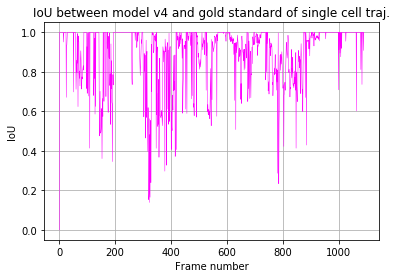

In [18]:
IoU_v4 = [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.950423632,0.991870837,1,1,1,1,1,1,1,1,0.67045634,0.931224793,0.935969248,0.964702895,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.697783152,1,1,1,1,1,1,1,0.892300242,0.711569744,0.780547467,0.858753388,0.795288792,0.977881155,0.843424102,0.993804956,0.62367652,0.98125,0.952526524,0.953212031,0.789540513,0.767220725,0.804024562,0.728559484,0.820663532,0.858353422,0.906252264,0.857270657,0.735881517,0.712554887,0.773950484,0.773877793,0.763661609,0.808425384,0.820037298,0.831185993,0.808625946,1,1,1,1,1,1,1,1,1,1,0.715198095,0.927092826,0.690814526,0.997075081,0.708186884,0.995530128,0.677163147,0.99657917,1,1,1,0.413530997,1,1,1,1,1,1,1,1,1,1,1,1,1,0.679847596,0.787655575,1,0.765549133,0.970137941,0.585546282,1,0.624621212,1,1,1,1,1,1,1,1,1,1,1,0.996987343,0.664561404,0.475472836,0.486322188,0.701264542,0.522274672,0.489597467,0.495558817,0.510643257,0.553252203,0.614415979,0.360725604,0.565326851,0.665484634,0.574476154,1,1,0.724442913,0.650464118,0.980193662,1,1,1,1,1,0.674622893,0.8899426,0.94385511,0.95,1,0.917511042,1,0.669119603,0.594654788,0.93566494,0.979886364,0.873284708,0.866292256,0.996981621,0.730663694,0.789995493,0.533459802,0.679784544,0.941112224,0.715060492,0.855894758,0.646054334,0.638409677,0.345402352,0.643779926,0.785972897,0.733333333,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.76736775,0.735387548,1,1,1,1,1,1,1,1,1,1,0.958713721,1,1,1,0.959212741,0.922679112,0.926186292,1,0.95435428,0.981331921,0.98457618,1,1,1,0.967502321,0.922749823,0.871354552,0.816669258,0.781392425,0.82749494,0.87550702,0.930010747,0.961844864,0.944319776,1,1,1,1,0.909090909,0.662302886,0.572157713,0.573645383,0.892530819,0.828312064,0.802822691,0.88369637,0.464554243,0.700433083,0.826415595,0.960023516,0.568776371,0.87390069,0.903534713,0.611277039,0.506045519,0.397878807,0.618787318,0.575578982,0.15271094,0.182660275,0.482807459,0.138795743,0.562494725,0.165328409,0.554499579,0.547727672,0.239200103,0.476021557,0.938537461,0.698728225,1,1,1,0.985617196,0.995336242,0.978966621,0.896014659,0.910473503,0.978694392,0.979867934,0.982752847,0.959936742,0.975581201,0.955045583,0.990832036,0.412969765,1,0.583324702,0.893301919,0.925758755,0.538274378,0.522976144,0.69183557,0.534587609,0.762009419,0.367657679,0.52459879,0.869325793,0.808037094,0.57641883,0.575605901,0.570949721,0.566428756,0.599053711,0.575964493,0.604016206,0.566209277,0.527051178,0.560425746,0.926780627,0.916013118,0.902537313,0.84967509,0.905862015,0.897683398,0.832221728,0.297042008,0.965522771,0.936831876,0.9021062,0.92685157,0.906656465,0.327132901,0.768312454,0.926130268,0.948235294,0.886734694,0.611276769,0.909615107,0.534247836,0.570970043,0.995250702,0.610922753,0.548483748,0.916052095,0.927828746,0.698427102,0.695427729,0.655585505,0.40651481,0.598796663,0.519332679,0.502582091,0.682512972,0.651815642,0.606096304,0.72207195,0.882344169,0.703543914,0.709194287,0.752249036,0.708224633,0.885383326,0.371585928,0.397248211,0.442182788,1,0.40650042,1,1,1,0.959966639,0.980139373,0.977693808,0.916931778,0.956411234,0.969996153,0.979922122,1,0.928029015,0.97542029,0.942165514,0.984006734,0.962203302,0.998160362,0.976488628,0.972696724,0.952161455,0.868384075,0.967108493,0.590361446,0.720421169,0.768124172,0.897909408,0.923123782,0.934664666,0.928771801,0.933049147,0.915873016,0.954954955,0.939435182,0.611065235,1,1,1,0.589195888,1,1,1,0.966518126,0.958415322,0.979380139,0.968678959,1,1,1,1,1,0.932237228,0.957598372,0.983655964,0.663413841,1,0.986989272,0.678977728,1,1,1,1,0.620740542,0.638672346,0.577678033,1,1,1,0.99881649,0.998754501,1,0.907592702,0.57034413,1,0.975144633,0.982892013,0.939495423,0.947686346,0.873559702,0.886200263,0.893450232,0.842904359,0.839513933,0.812817119,0.843954421,0.862671527,0.841013344,0.823716252,0.849225398,0.908920498,0.922940064,0.938179348,1,0.926184152,0.941307815,0.91058849,0.932877901,0.962550725,0.972294177,0.943544278,0.953264173,0.960380349,0.886106781,1,1,1,1,0.706393387,1,0.883338473,0.947554698,0.920747151,0.598215484,0.635152954,0.589963834,0.581762039,0.609133923,0.597435219,0.580545186,0.601783877,0.561950728,0.655252045,0.782986425,0.816298964,0.610517939,0.526855205,0.791773504,0.963999535,0.658802178,0.953178014,0.948806301,0.935159176,0.916657332,0.901167591,0.91758862,0.919034091,0.938185444,0.981236443,0.976330099,0.975340755,0.956145526,0.94377871,0.976640476,0.97696477,0.989085072,0.574706172,0.936780793,0.987415295,0.957598372,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.992666157,1,1,1,1,1,1,0.980663673,0.981950712,0.954481464,1,1,1,1,1,1,0.989879567,1,1,1,1,1,0.963107936,1,0.958976982,0.974318761,0.951971395,0.959698719,0.95524957,0.983763768,0.954682211,0.973710616,0.951712294,0.941846026,0.964378171,0.958132869,0.968026235,0.887351175,0.915609656,0.944816393,0.655134662,0.945176815,0.930286521,0.945076892,0.50753797,0.950496042,0.943189732,0.895657132,0.92151874,0.943034238,0.985989492,0.963800905,0.948267152,0.890680458,0.852118684,0.852124424,0.916248746,0.920321716,0.877226956,0.883294467,0.910984456,0.911086042,0.660478376,0.740210199,0.639340857,0.964959873,0.980894743,0.958470977,0.948445953,0.899675359,0.897857222,0.864550148,0.856390412,0.913105413,0.80887372,0.89183065,0.914189503,0.816480502,0.898817068,0.905233685,0.940680749,0.914146238,0.869462188,0.926441131,0.999432592,1,0.897095095,0.649237653,0.70666308,0.996711731,0.714466203,0.955874464,0.910253065,0.800544881,0.664645485,0.856915934,0.904560051,0.791943433,0.668646585,0.78998779,0.785276074,0.820809249,0.924895859,0.840928528,0.938393179,0.977007299,0.962121212,0.935609088,0.978688857,1,1,1,0.937699397,0.976620101,0.977440646,0.976646881,0.980647986,0.989422222,0.993847028,0.978643216,0.946108321,0.989779192,0.882256675,0.93229627,0.928974359,0.947741211,0.97456516,0.946479854,0.961909777,0.942499562,0.981522806,0.989096573,0.970344009,0.982640518,0.972851509,1,1,1,1,1,1,1,1,1,1,1,0.998929649,1,1,1,1,0.758843586,0.797603294,1,0.800435866,1,0.942888323,1,1,0.890542763,0.703389285,0.750033285,0.698063941,0.68716489,0.695358822,0.9688483,0.952847334,0.920317184,0.93064949,0.880779643,0.945747968,0.938592456,0.925488911,0.936563777,0.905651931,0.736130618,0.745311226,0.678823081,0.707717379,0.754704391,0.777433171,0.793060331,0.786778694,0.819181326,0.787367725,0.884802221,0.887260817,0.831747621,0.789731801,0.803350084,0.706819716,0.815480078,0.748104706,0.807161125,0.286557581,0.699428571,0.99681282,0.341083852,0.233219568,0.536132813,0.63541121,0.699898785,0.837751856,0.884679666,0.807379013,0.889115994,0.888151659,0.838754008,0.871523179,0.901639344,0.840034587,0.792651873,0.758440654,0.716600529,0.735405872,0.718238078,0.42247827,0.682918628,0.687655639,0.73318872,0.746987952,0.706412478,0.773218948,0.836611195,0.880923935,0.949569977,0.931572109,0.896507115,0.869166334,0.884206219,0.904761905,0.984710593,0.958213847,0.831838565,0.795655376,0.813566045,0.797495528,0.747766323,0.672690078,0.721351025,0.712967236,0.758914729,0.781399046,0.91316726,0.810549777,0.769310345,0.818386371,0.793943384,0.873887696,0.738466239,0.727443022,0.739974539,0.718878033,0.742923166,0.804191429,0.739987285,0.770826784,0.728094793,0.707079915,0.897581368,0.413416116,0.799259681,0.737752161,0.704212454,0.648737291,0.650314089,0.692194836,0.84195882,0.908524497,0.888279446,0.852148997,0.849473156,0.879257753,0.820519481,0.86255802,0.689437586,0.822822086,0.882581002,0.942365474,0.881513988,0.846793349,0.741716671,0.691428571,0.710797886,0.598344881,0.824960754,0.900325027,1,1,1,1,1,0.977755308,0.669857768,1,1,0.973719496,0.429037208,0.958506224,0.958398336,0.959859914,0.958212878,0.950997151,0.959691913,0.957627119,0.957232704,0.915946583,1,0.93899553,0.880159125,0.970780856,0.972319202,0.979926561,0.982858583,0.9834462,1,0.988641975,0.970287384,1,1,1,0.982938389,0.992191197,0.982447818,0.930419493,1,0.993192317,0.971870248,0.959626604,0.9718588,0.961964372,0.965748503,0.982294446,0.977889218,0.971614705,0.977657573,0.971088832,0.982338902,0.978524103,0.967338429,0.974263088,0.963764813,1,0.955782313,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.966216216,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.708610694,1,0.911309368,1,1,0.894386805,0.945390071,1,0.875747814,1,0.931673863,0.91851369,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.954424242,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.601968668,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.811229762,1,1,1,0.735863793,1,1,1,1,0.907703488,1]
IoU_v5 = [0.811075858,0.820352905,0.82379057,0.836398411,0.857427433,0.871975239,0.88079561,0.839085182,0.856720827,0.871235444,0.858689767,0.842044581,0.849120603,0.83673716,0.867038852,0.776655443,0.837250787,0.768580888,0.788285109,0.73718021,0.850232455,0.850116107,0.869052863,0.795604622,0.719417679,0.809305792,0.791411043,0.805486901,0.800666032,0.821602953,0.826918723,0.843240814,0.819506228,0.837073374,0.798383755,0.81531129,0.812941049,0.816873049,0.831532227,0.837753342,0.86782494,0.849396243,0.878867102,0.849876442,0.854286012,0.839782408,0.864990985,0.877473684,0.872590553,0.856340372,0.876983693,0.883031301,0.889054612,0.879182356,0.828252373,0.872106617,0.856540084,0.861219196,0.753846154,0.708700652,0.837119589,0.809989142,0.848958843,0.884194743,0.852411685,0.88175933,0.733223979,0.811797051,0.553578027,0.780579844,0.446234426,0.395402815,0.415032922,0.329073101,0.010483826,0.01020996,0.00690778,0.774774048,0.721268657,0.706539203,0.802831824,0.828061716,0.763497653,0.799701524,0.776644569,0.765040825,0.748737096,0.88455456,0.866979656,0.881830861,0.887826407,0.87024987,0.86640574,0.85845563,0.815041783,0.799780581,0.808040615,0.803434858,0.83540891,0.798915663,0.796800586,0.801005355,0.832266608,0.807931943,0.788518944,0.774537037,0.786563071,0.705667276,0.710433245,0.810574612,0.790120697,0.845143763,0.808770195,0.84,0.846297312,0.825858724,0.835071633,0.827385892,0.80423541,0.767351183,0.558628984,0.40840889,0.58629144,0.854999257,0.753670261,0.841015364,0.796552625,0.822879248,0.829295617,0.823796185,0.8805292,0.871216999,0.735173824,0.850048416,0.833530261,0.839241334,0.867060182,0.814507772,0.822947711,0.823002848,0.806323024,0.835000705,0.834948729,0.798315729,0.823148409,0.638728324,0.659300377,0.642756833,0.667910448,0.616529094,0.663868159,0.689877364,0.685820896,0.626385006,0.838414634,0.824043387,0.781277469,0.822027923,0.835455716,0.835522715,0.873640743,0.866588724,0.851247346,0.820979738,0.824825986,0.840183246,0.883390918,0.810220647,0.845637584,0.776226238,0.612625668,0.738858897,0.721892213,0.717360272,0.712117831,0.743231987,0.743744255,0.70131943,0.751097783,0.739362795,0.720607838,0.602461594,0.559443979,0.549654577,0.67588793,0.598705025,0.666924505,0.626876455,0.767318612,0.613472183,0.595140543,0.629660779,0.629663581,0.748976009,0.771588201,0.817186041,0.583035481,0.55021228,0.663029163,0.641605839,0.614902158,0.804987359,0.814243256,0.597934535,0.427681353,0.580008435,0.448355207,0.522653483,0.545872518,0.500251857,0.792705932,0.565735893,0.578910231,0.53208885,0.729018044,0.852517188,0.869091701,0.55705036,0.86068981,0.850928382,0.87457483,0.86315229,0.874276527,0.89362851,0.895559123,0.898247536,0.884802071,0.924890175,0.923629733,0.894093048,0.917340615,0.904537056,0.875012901,0.895471497,0.89695749,0.908073197,0.898210168,0.863336086,0.874440418,0.914770907,0.900266951,0.902198391,0.854689,0.759095106,0.744428503,0.865990623,0.922400833,0.740709773,0.777869872,0.754485819,0.755620438,0.718823863,0.873257983,0.896991796,0.849175611,0.755227296,0.853166403,0.677121947,0.665561622,0.859150023,0.86763418,0.896911352,0.891487626,0.84694142,0.860363823,0.816986234,0.641511185,0.62876413,0.83578121,0.872727273,0.818993711,0.655371371,0.870085253,0.879174618,0.841374357,0.836891845,0.870708283,0.812794303,0.878120054,0.846507581,0.896443149,0.8707685,0.851004851,0.824197026,0.795084887,0.779115982,0.799173657,0.841129527,0.861138031,0.851022664,0.834566886,0.844456405,0.847522064,0.918873313,0.895663601,0.920333737,0.922961138,0.897814208,0.901317558,0.840869681,0.893401015,0.908208062,0.885814448,0.884529978,0.860839715,0.803390688,0.863935722,0.811046134,0.815854773,0.809743252,0.819519557,0.799221058,0.851581509,0.891840123,0.878881156,0.825200741,0.766227307,0.838642298,0.794230309,0.803853755,0.765470439,0.7498281,0.768063918,0.705238797,0.827010622,0.748651079,0.869077621,0.856699919,0.830708661,0.551672797,0.879762226,0.524443723,0.435827897,0.583428354,0.562964393,0.42466935,0.588522027,0.80873812,0.629781141,0.603518537,0.768238613,0.792040206,0.748373984,0.71871672,0.744428133,0.802382241,0.782749402,0.758108108,0.82529025,0.565116768,0.596675784,0.602025765,0.579513244,0.528232446,0.615159782,0.517037454,0.573651653,0.560763246,0.820447609,0.635589071,0.764401135,0.656677335,0.822141561,0.593395349,0.574705172,0.814403395,0.828451883,0.852878465,0.592675501,0.55064847,0.606290195,0.813316739,0.545705893,0.56872837,0.567977177,0.549010323,0.56010556,0.790357661,0.73464036,0.581608516,0.774870466,0.757375825,0.736527676,0.736745214,0.728131843,0.721224297,0.712835388,0.712430202,0.764104415,0.746949414,0.758687259,0.770037279,0.725346557,0.997993469,0.737172178,0.713946588,0.686262602,0.52173913,0.743117152,0.517604771,0.539667661,0.536771964,0.556912555,0.505406488,0.516238048,0.564868743,0.55706885,0.546208531,0.583741347,0.75806843,0.704989154,0.771039306,0.697246632,0.668361008,0.723363363,0.571801141,0.856936937,0.831476486,0.864502896,0.807472632,0.845280899,0.804761362,0.604476991,0.636663565,0.639010309,0.61967403,0.869595296,0.821503865,0.822838847,0.840469141,0.594994852,0.851377953,0.836962529,0.809941841,0.772252718,0.768424611,0.746156514,0.791983878,0.561546118,0.741498809,0.714850773,0.763532159,0.776013731,0.791858597,0.786912752,0.783649789,0.750560119,0.769062728,0.737388724,0.728042558,0.806643474,0.741104294,0.762945161,0.767213115,0.785947528,0.762042588,0.80590627,0.720045605,0.750896814,0.802789052,0.771150016,0.798595875,0.843457944,0.825191626,0.867357395,0.853461056,0.83093235,0.862061129,0.891204764,0.84580373,0.845556805,0.838021978,0.860140617,0.807058326,0.834366426,0.820652723,0.826046703,0.853874155,0.769717038,0.81824611,0.783445812,0.817540515,0.511124888,0.737262181,0.800196175,0.531013423,0.530918259,0.724044195,0.83447383,0.75342839,0.667057974,0.70688379,0.811459754,0.840461138,0.815965358,0.791799633,0.811924809,0.590156046,0.803783784,0.817178369,0.770232032,0.754687063,0.706617086,0.758588411,0.755746044,0.741627672,0.726854955,0.726199616,0.775168112,0.812844217,0.806840455,0.840083383,0.773321793,0.817336874,0.77961034,0.79462572,0.767711301,0.777486175,0.864306499,0.843347438,0.776263651,0.800668151,0.832533235,0.868180954,0.867243867,0.868968302,0.815432742,0.878338877,0.795233366,0.833034469,0.830856687,0.804648426,0.867598451,0.825144779,0.785112741,0.845438147,0.800834391,0.658262351,0.771573137,0.672486346,0.816330039,0.772723137,0.621926789,0.592366006,0.64197052,0.719323812,0.790259992,0.820798604,0.787207755,0.735733099,0.760640819,0.705071174,0.718735851,0.753575358,0.783911234,0.767242202,0.769782849,0.792304819,0.79943348,0.854134797,0.835615204,0.826942812,0.816241299,0.811089866,0.801210197,0.584913218,0.557711023,0.802454705,0.857719177,0.867334789,0.857287757,0.883583635,0.866606983,0.874673902,0.862772981,0.840755294,0.867124611,0.85559911,0.830393917,0.869707551,0.837989454,0.851536425,0.861243476,0.875450215,0.885724542,0.844701901,0.793441742,0.803278689,0.868333759,0.812224877,0.836713164,0.838673285,0.880796175,0.843301573,0.844191394,0.863646711,0.877746279,0.884919738,0.871186441,0.853884852,0.840061599,0.83481722,0.776047654,0.843111471,0.833015937,0.812394478,0.81248183,0.848692033,0.851282051,0.833827893,0.83774933,0.847203665,0.838216807,0.861407888,0.85708779,0.854460984,0.797122582,0.825241798,0.848365276,0.838634888,0.83931803,0.867523865,0.864686793,0.836758661,0.839484646,0.877894944,0.841320865,0.875012149,0.900924833,0.86712045,0.886333969,0.885596141,0.887945339,0.886923309,0.862859885,0.842380454,0.849773085,0.830514774,0.863110358,0.847698664,0.840939342,0.822650785,0.807906887,0.801479539,0.828085764,0.836399217,0.908269914,0.828566156,0.833491192,0.88618447,0.844115588,0.78337579,0.807351555,0.740577948,0.852056612,0.822456379,0.784862798,0.72564551,0.781902803,0.753206885,0.784888204,0.753689351,0.863491715,0.742007673,0.832402846,0.80666811,0.769667875,0.765854661,0.776479106,0.7827051,0.832834165,0.794108091,0.824129981,0.808484848,0.784104921,0.002431771,0.771511628,0.849674807,0.823486771,0.798911758,0.813795612,0.832595326,0.812267163,0.810247553,0.831634489,0.878656555,0.822843256,0.791706387,0.843644273,0.817774006,0.866910098,0.866714099,0.884412076,0.917967375,0.919911142,0.91952521,0.908634429,0.870967742,0.866983624,0.870559846,0.883220952,0.89962406,0.856188568,0.859532737,0.87474825,0.858793662,0.856433889,0.883871565,0.83244916,0.845044411,0.910292998,0.872031421,0.867815066,0.863993174,0.869972499,0.886294592,0.857523417,0.865253078,0.844392805,0.893605824,0.871090487,0.869890768,0.861123397,0.831410593,0.899531264,0.887721485,0.850215131,0.866416257,0.877626459,0.869155282,0.906295754,0.8804338,0.900027415,0.902796146,0.900451157,0.887230827,0.863334808,0.85856537,0.835644872,0.903857225,0.913319239,0.881427166,0.88356428,0.911532235,0.912236457,0.866846847,0.896551724,0.883202945,0.925805316,0.900052789,0.87050679,0.86711731,0.862962301,0.83424259,0.848356623,0.867627916,0.834818434,0.896956978,0.895770235,0.907574094,0.912213322,0.869406488,0.856647524,0.86453202,0.850260146,0.828618241,0.781910593,0.777945795,0.83879563,0.886723329,0.878347708,0.784613209,0.787708693,0.767412231,0.761266568,0.775805489,0.748236649,0.729143179,0.785222579,0.623805387,0.003337823,0.00258018,0.443900948,0.003830305,0.619469027,0.602037846,0.664292981,0.508920472,0.598632813,0.645887899,0.694641052,0.750265111,0.787761852,0.687321258,0.787924911,0.805802527,0.784065188,0.759598604,0.812556459,0.792363792,0.634189237,0.679151943,0.615803815,0.580357143,0.639642734,0.629124821,0.600473613,0.603748327,0.603688239,0.631136045,0.645735027,0.721883469,0.808351178,0.724292101,0.850899743,0.861263235,0.79243732,0.752091255,0.807067138,0.766819572,0.847457627,0.824460916,0.81231003,0.738078035,0.710404004,0.719544592,0.755060034,0.699006623,0.709367759,0.684832317,0.719967532,0.735447761,0.662495399,0.785524568,0.63630137,0.685602351,0.6957638,0.702875399,0.716814159,0.640634175,0.82326555,0.646786156,0.796362552,0.834322872,0.665220087,0.645853043,0.646875,0.653846154,0.605951307,0.813108946,0.646556977,0.627389444,0.615752551,0.610500611,0.592556317,0.600119367,0.630144928,0.655251142,0.878993497,0.873497424,0.79214911,0.74736578,0.72129065,0.745666235,0.538402062,0.582580115,0.524171779,0.626538988,0.902917917,0.621269669,0.820166619,0.784226965,0.793525571,0.750811486,0.795569789,0.780569085,0.851235231,0.899222728,0.912090885,0.90593418,0.892874693,0.947538337,0.895254922,0.594947025,0.912248629,0.901554404,0.913043478,0.868499864,0.887845724,0.890120968,0.89974026,0.888689408,0.881953867,0.856157384,0.871712952,0.896790123,0.89475019,0.867494299,0.913407821,0.893622261,0.890039448,0.904375615,0.897367138,0.914050822,0.899205561,0.900645802,0.912340842,0.890503876,0.893066406,0.893229799,0.871445358,0.895310279,0.855994325,0.898128406,0.573913043,0.902851619,0.911778963,0.924204144,0.88032596,0.895198635,0.866492147,0.897643418,0.921460969,0.844084796,0.875756166,0.881232361,0.884499187,0.886401524,0.871451283,0.850941663,0.859903382,0.851422071,0.894974994,0.874915331,0.899302326,0.845369584,0.898428604,0.883731618,0.887722501,0.895070104,0.894979171,0.855091384,0.895255558,0.871569704,0.855397149,0.870866142,0.887625114,0.873454709,0.866696389,0.900091241,0.874787673,0.860004354,0.865859339,0.866069323,0.872672253,0.870470127,0.830572646,0.852819136,0.885150812,0.863921842,0.864744491,0.871318204,0.86332008,0.883653846,0.871564096,0.854973941,0.884442221,0.848499876,0.86922902,0.861802368,0.895242452,0.884171666,0.865993575,0.855072464,0.854319853,0.855485742,0.866698519,0.82183908,0.872966507,0.869411244,0.856568365,0.86267017,0.852032125,0.860595703,0.854215184,0.901051188,0.833106576,0.856910191,0.857208448,0.870535714,0.596566524,0.835697941,0.844299831,0.863431953,0.828388322,0.851833741,0.887635054,0.865439093,0.828427473,0.764280876,0.888422612,0.841943734,0.856469936,0.89206665,0.843073862,0.862940462,0.869873998,0.841322738,0.869858071,0.902287893,0.772747953,0.92053973,0.792157703,0.802723984,0.84622871,0.89432931,0.901213997,0.826375083,0.906848052,0.829113924,0.820634169,0.865505226,0.625606208,0.785514019,0.53750586,0.897767333,0.897806813,0.89261745,0.81047266,0.782935154,0.900330657,0.589561692,0.897860137,0.521835513,0.85842495,0.925277162,0.918331114,0.902033272,0.897010692,0.883400466,0.917001339,0.881605806,0.929189063,0.831367106,0.894323536,0.900614305,0.934145241,0.921989051,0.890246471,0.900208333,0.86943557,0.896442854,0.92264574,0.905790838,0.880321966,0.920462428,0.833113166,0.915414341,0.898215045,0.907196139,0.912602503,0.925958,0.886416124,0.879193206,0.922061596,0.891954999,0.881468377,0.894964684,0.91172091,0.861394936,0.873431653,0.868310945,0.882734114,0.905274725,0.908124862,0.917976319,0.893654654,0.891928251,0.906513742,0.910908687,0.893667603,0.901435612,0.8602537,0.934626935,0.929092567,0.932032147,0.885126714,0.896701389,0.933152051,0.854300243,0.902360515,0.908172429,0.909797823]


t1 = range(1093)
t2 = range(1091)
s1 = IoU_v5
s2 = IoU_v4

fig, ax = plt.subplots()
ax.plot(t1, s1, linewidth = 0.5, color = "magenta")

ax.set(xlabel='Frame number', ylabel='IoU',
       title='IoU between model v5 and gold standard of single cell traj.')
ax.grid()

fig.savefig("C:/Users/Nathan/data/fucci/metrics/results_modelv5/graph_output/IoU_v5_gold_singlecell.png", dpi = 1000)
plt.show()

fig, ax = plt.subplots()
ax.plot(t2, s2, linewidth = 0.5, color = "magenta")

ax.set(xlabel='Frame number', ylabel='IoU',
       title='IoU between model v4 and gold standard of single cell traj.')
ax.grid()

fig.savefig("C:/Users/Nathan/data/fucci/metrics/results_modelv4/graph_output/IoU_v4_gold_singlecell.png", dpi = 1000)
plt.show()